In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras import activations
from keras import initializers
import numpy as np
import pandas as pd
import keras
from keras import layers
from keras import ops
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
 # fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
X = np.load('X_av_goiener.npy')

In [4]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import StandardScaler


In [5]:
import kshape
import numpy as np
from kshape.core import KShapeClusteringCPU 

In [6]:
X2 = X.reshape((X.shape[0], X.shape[1], 1))
X2.shape

(164, 24, 1)

In [77]:
X1 = X
X2 = X1.reshape((X1.shape[0], X1.shape[1], 1))
X2.shape

(164, 24, 1)

In [11]:
np.random.seed(seed)
org_dim = 24
latent_dim = 12
int_dim = 32

input_ts = keras.Input(shape=(org_dim,))
encoded = Dense(int_dim, activation='relu')(input_ts)
encoded = Dense(latent_dim , activation='relu')(encoded)

decoded = Dense(int_dim, activation='relu')(encoded)
decoded = Dense (org_dim, activation ='relu')(decoded)

autoencoder = keras.Model(input_ts, decoded)
encoder = keras.Model(input_ts, encoded)

encoded_input = keras.Input(shape=(latent_dim ,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1](decoder_layer1(encoded_input))
decoder = keras.Model(encoded_input, decoder_layer2)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,404 (9.39 KB)

 Trainable params: 2,404 (9.39 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = autoencoder.fit(X2, X2, epochs=20, batch_size=10)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 
Epoch 13/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045     
Epoch 14/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 
Epoch 15/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 


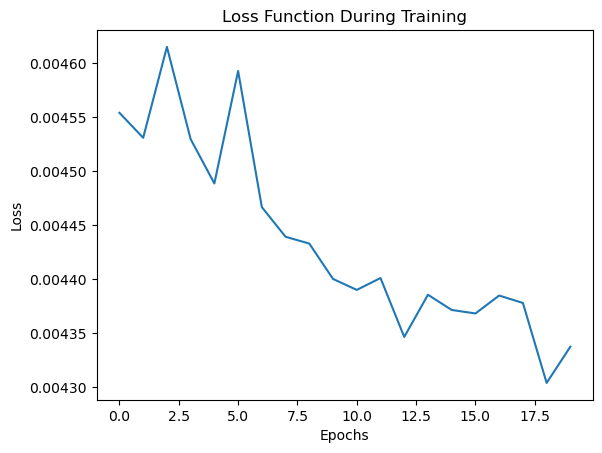

In [55]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.show()

In [19]:
Z = autoencoder.predict(X,batch_size=None, verbose="auto", steps=None, callbacks=None)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


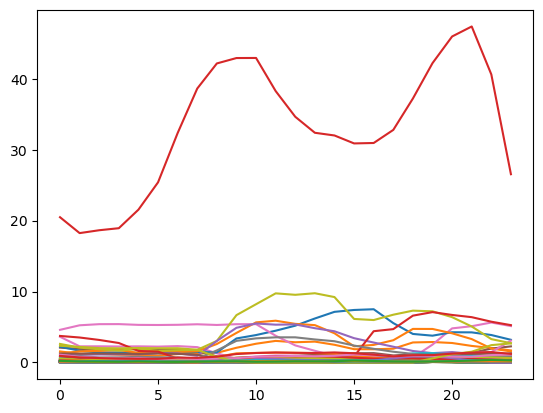

In [20]:
import matplotlib.pyplot as plt
plt.plot(Z.T)
plt.show()

In [21]:
L = encoder.predict(X2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.016 --> 0.016 --> 
0.008 --> 0.012 --> 
0.006 --> 0.009 --> 
0.006 --> 0.008 --> 
0.005 --> 0.008 --> 


Text(0.5, 1.0, 'Elbow Method for Optimal Number of Clusters - KMeans')

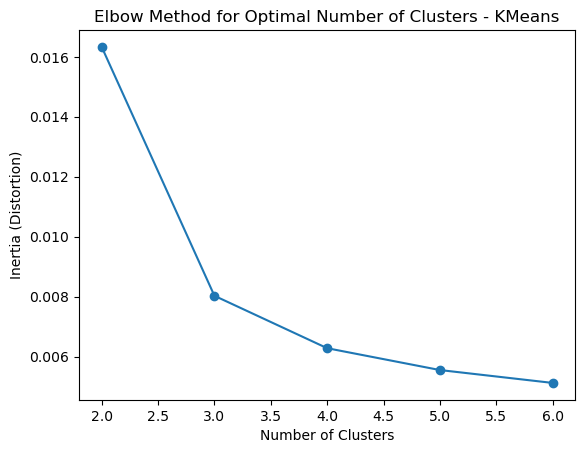

In [23]:
X_normalized  = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(L)
cluster_range = range(2, 7)
inertia_values = []

for n_clusters in cluster_range:
    ks = KShape(n_clusters=n_clusters, verbose=True, random_state=0)
    ks_cluster_assignments = ks.fit_predict(X_normalized)
    labels = ks.labels_
    inertia_values.append(ks.inertia_)
    
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal Number of Clusters - KMeans')

In [25]:
n_clusters=4

In [41]:
#TS learn
X2a = TimeSeriesScalerMeanVariance().fit_transform(L)
ksc = KShape(n_clusters=n_clusters, verbose=False, random_state=2)
ksc.fit(X2a)
labels = ksc.labels_
ksc_cluster_assignments = ksc.fit_predict(X2a)
ksc.cluster_centers_.shape
cluster_centroids = ksc.cluster_centers_

In [42]:
labels

array([3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 0, 2, 0, 2, 0, 3, 3,
       2, 3, 3, 2, 0, 3, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 3, 3, 0, 0, 3,
       3, 0, 3, 3, 2, 2, 2, 3, 0, 2, 0, 0, 1, 2, 0, 2, 2, 3, 2, 3, 1, 0,
       2, 3, 1, 2, 0, 2, 1, 3, 2, 3, 2, 2, 3, 0, 2, 1, 3, 1, 1, 2, 2, 2,
       2, 2, 3, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 0, 0, 2, 1,
       3, 2, 3, 3, 3, 2, 0, 3, 2, 3, 3, 2, 2, 3, 3, 2, 0, 2, 2, 3, 1, 2,
       3, 2, 2, 3, 1, 2, 3, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 3, 2, 1, 3, 2, 0, 0, 3, 2], dtype=int64)

In [43]:
ksc_cluster_assignments

array([3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 0, 2, 0, 2, 0, 3, 3,
       2, 3, 3, 2, 0, 3, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 3, 3, 0, 0, 3,
       3, 0, 3, 3, 2, 2, 2, 3, 0, 2, 0, 0, 1, 2, 0, 2, 2, 3, 2, 3, 1, 0,
       2, 3, 1, 2, 0, 2, 1, 3, 2, 3, 2, 2, 3, 0, 2, 1, 3, 1, 1, 2, 2, 2,
       2, 2, 3, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 0, 0, 2, 1,
       3, 2, 3, 3, 3, 2, 0, 3, 2, 3, 3, 2, 2, 3, 3, 2, 0, 2, 2, 3, 1, 2,
       3, 2, 2, 3, 1, 2, 3, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 3, 2, 1, 3, 2, 0, 0, 3, 2], dtype=int64)

In [44]:
for i in range(n_clusters):
    num_points_in_cluster = len(X2a[labels == i])
    print(f"Cluster {i}: {num_points_in_cluster} data points")

Cluster 0: 25 data points
Cluster 1: 20 data points
Cluster 2: 76 data points
Cluster 3: 43 data points


In [45]:
xc = cluster_centroids
xc1 = xc.reshape((xc.shape[0], xc.shape[1]))
df_c = pd.DataFrame(xc1)

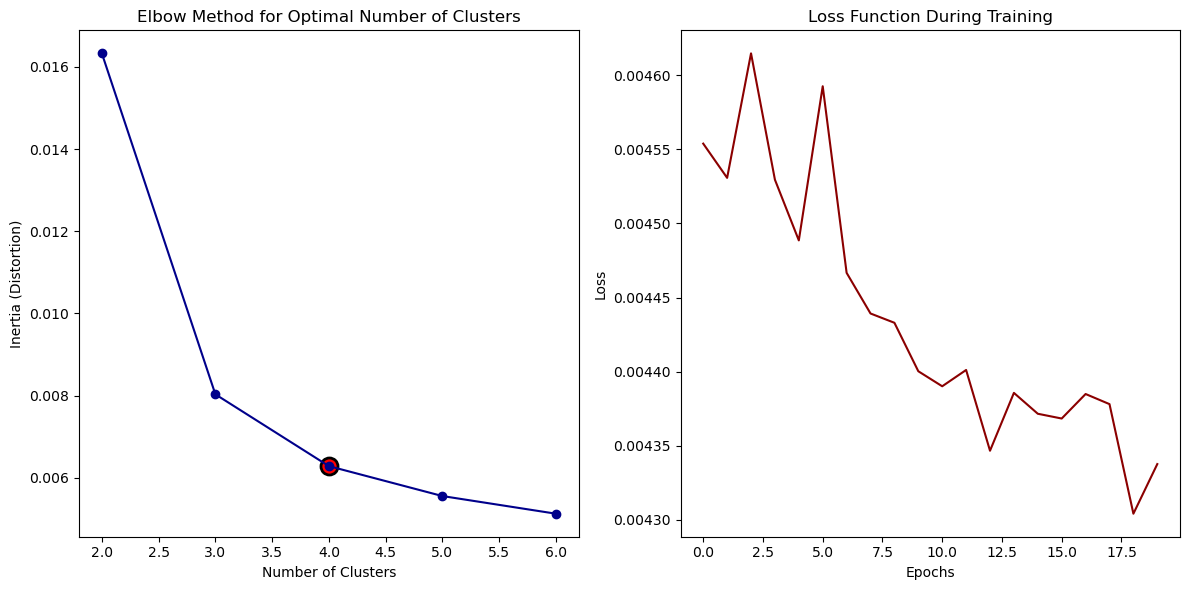

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Inertia values
axs[0].plot(cluster_range, inertia_values, marker='o', color='darkblue')
axs[0].scatter(4, inertia_values[2], color='red', s=150, edgecolors='black', linewidths=2)  # Highlighting the point
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Inertia (Distortion)')
axs[0].set_title('Elbow Method for Optimal Number of Clusters')
axs[0].grid(False)

# Plotting Loss Function During Training
axs[1].plot(history.history['loss'], color='darkred')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Loss Function During Training')
axs[1].grid(False)

plt.tight_layout()
plt.savefig("goiner_aecseg_inertia_loss_highlight.pdf", format='pdf', bbox_inches='tight')
plt.show()

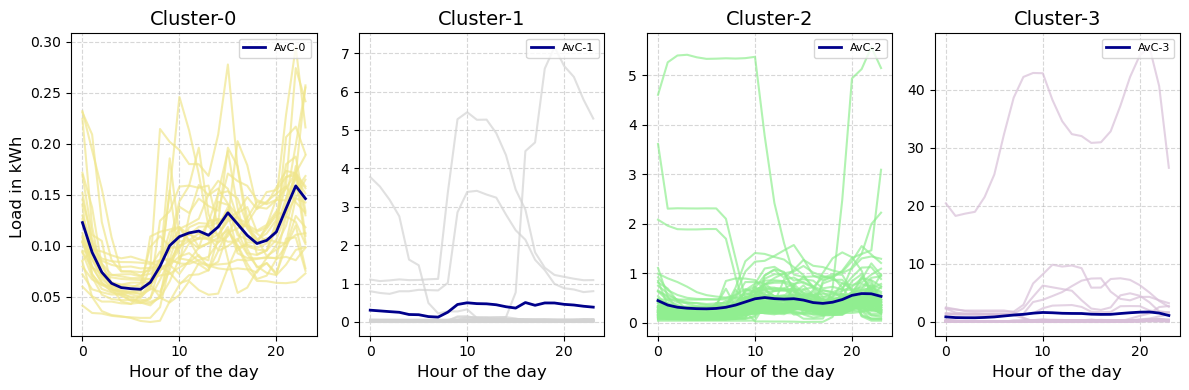

In [59]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh ', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 1.5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("aekshape_cseg.pdf", format='pdf', bbox_inches='tight')

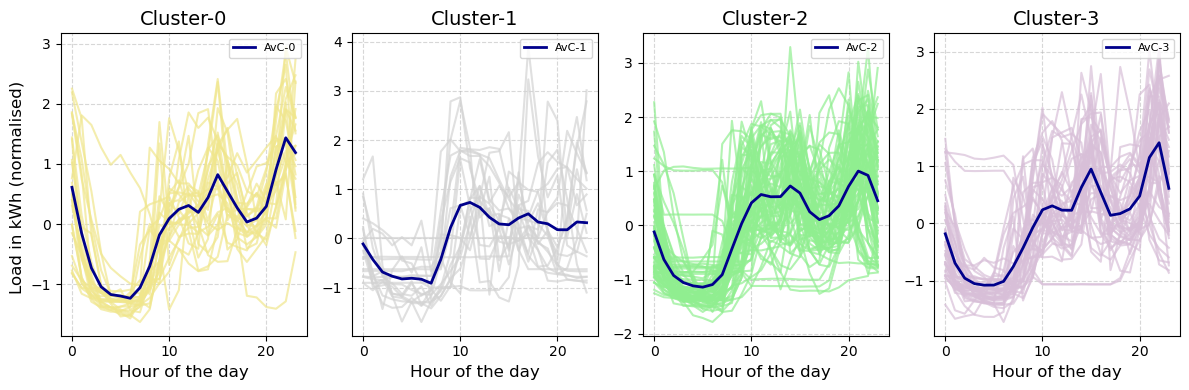

In [61]:
plt.figure(figsize=(12, 4))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle', 'lightblue', 'lightsalmon','cyan','orange']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2 = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
    X2b = X2.reshape((X2.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
#     x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh (normalised) ', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 4)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("goiner_norm_aekshape_cseg.pdf", format='pdf', bbox_inches='tight')

In [49]:
from tslearn.metrics import cdist_dtw
from tslearn.metrics import dtw
from sklearn.metrics import silhouette_score
silhouette_score(X, labels, metric=dtw)  

-0.21488643286750375

In [50]:
silhouette_score(X, labels) 

-0.23878415192346072

In [51]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, labels)

1.3789920276283343

In [52]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

6.33340470870176

In [94]:
#PMS with mean

y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(np.mean(X[labels == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

37.0 0.22560975609756098


NameError: name 'dmd_pk' is not defined

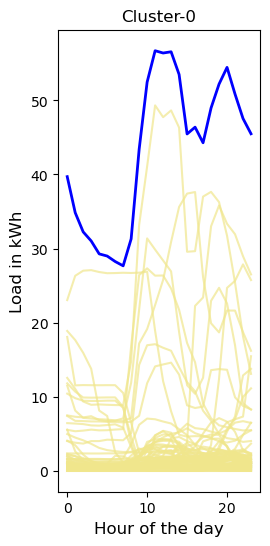

In [95]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming cluster_assignments_scaled, cluster_centers_scaled, and X are defined

plt.figure(figsize=(12, 6))

colors = ['khaki', 'orange', '#90EE90', 'thistle']  # Different color combinations

for i in range(3):
    ax = plt.subplot(1, 4, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=12)
    
    x1 = X1[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    
    plt.plot(x2*5, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x4, linewidth=2, color='blue', alpha=1, label=f'CCC-{i}')  # Cluster centroids with label
#     plt.plot(x3*5, linewidth=2, color='darkblue', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(dmd_pk,linewidth = 2, color='red', label ='Demand')
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids
    x4_array = np.array(x4[20:24]).reshape(-1, 1).T
    dmd_pk_array = np.array(dmd_pk[20:24]).reshape(-1, 1).T
    distances = euclidean_distances(x4_array, dmd_pk_array)
    sbdist = sbd_distance(x4_array, dmd_pk_array)
    print(i, distances,dtw(dmd_pk[20:24],x4[20:24]),sbdist)
plt.tight_layout()

# Save as PDF
plt.savefig("final/cc_kshape.pdf", format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
X2b[labels == 1][0,:]

In [ ]:
xc[1, :].T.shape

In [ ]:

X2b[labels == 0][0,:].reshape(1,-1).shape

In [ ]:
#Shape based distance
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(xc[j, :].T, X2b[labels == j][i,:].reshape(1,-1))
print(k)

In [ ]:
peaks_indices = np.argmax(x4) 
peak_rlc = np.argmax(dmd_pk, axis=0)

In [ ]:
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(np.mean(X[labels == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

In [ ]:
peak_dem = np.argmax(dmd_pk, axis=0)

In [ ]:
peaks_indices

In [ ]:
def arsum(arr):
    n = len(arr)
    sum = 0
    for element in arr:
        sum+=element
    return sum

In [ ]:
dmd_pk=X.sum(axis=0).T
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pms = np. zeros((n_clusters,1))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    
    x1 = X1[labels == j]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
    peak_dem = np.argmax(dmd_pk, axis=0)
    c[j,peak_dem] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        pms[j,:] = pms[j,:] + np.dot(c[j,:],y[i+l,:])/len(X[labels == j])
#         print(len(X[labels == j]))
    l = l + len(X[labels == j])
#     print(peaks_indices,pm)
print(pm)
print(pms)

In [ ]:
y[1,peaks_indices[:]]